In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import json

In [ ]:
data1 = pd.read_csv('/content/gdrive/MyDrive/Северсталь/okved_companies_data_sber.csv', index_col = 0).set_index('inn')
data2 = pd.read_csv('/content/gdrive/MyDrive/Северсталь/okved_companies_data.csv', index_col = 0).set_index('inn')
data = pd.concat([data1, data2])

In [ ]:
data

,ogrn,respondent,plaintiffs,third,Unnamed: 0.1,okved
inn,,,,,,
7327002626,1027301481008,184,281,22,NaN,NaN
4205281286,1144205002171,28,14,3,NaN,NaN
4027058189,1024001186747,1,7,0,NaN,NaN
2460110863,1182468060664,0,1,0,NaN,NaN
540505309199,304540434100046,3,17,0,NaN,NaN
...,...,...,...,...,...,...
7415101591,1187456049450,0,0,0,2614.0,25.94
5027271631,1185027030253,5,0,0,2615.0,25.94
9109023041,1199112007324,0,1,0,2616.0,25.94


In [ ]:
sber_22_19 = pd.read_csv('/content/gdrive/MyDrive/Северсталь/tenders_sber_22_19_aggregates.csv', index_col = 0)
sber_25_94 = pd.read_csv('/content/gdrive/MyDrive/Северсталь/tenders_sber_25_94_aggregates.csv', index_col = 0)

In [ ]:
sber_22_19

,cnt_participated,cnt_won,sum_participated_amount,sum_won_amount,mean_participated_amount,mean_won_amount
inn,,,,,,
1001141373,1.0,0.0,766665.00,0.00,7.666650e+05,NaN
10201137805,1.0,1.0,592000.00,592000.00,5.920000e+05,592000.000
107024300,1.0,1.0,330528.90,330528.90,3.305289e+05,330528.900
1101107584,1.0,0.0,718500.00,0.00,7.185000e+05,NaN
1108022379,1.0,0.0,63910000.00,0.00,6.391000e+07,NaN
...,...,...,...,...,...,...
9724010627,7.0,2.0,2644253.48,78155.69,3.777505e+05,39077.845
9725035286,1.0,0.0,1167447.00,0.00,1.167447e+06,NaN
9728038493,1.0,1.0,770074.87,770074.87,7.700749e+05,770074.870


In [ ]:
data['participated'] = [0 for i in range(len(data))] 
for inn, row in sber_22_19.iterrows():
  if inn in data.index:
    data.loc[inn, 'participated'] = 1
for inn, row in sber_25_94.iterrows():
  if inn in data.index:
    data.loc[inn, 'participated'] = 1

In [ ]:
data

,ogrn,respondent,plaintiffs,third,Unnamed: 0.1,okved,participated
inn,,,,,,,
7327002626,1027301481008,184,281,22,NaN,NaN,1
4205281286,1144205002171,28,14,3,NaN,NaN,1
4027058189,1024001186747,1,7,0,NaN,NaN,1
2460110863,1182468060664,0,1,0,NaN,NaN,1
540505309199,304540434100046,3,17,0,NaN,NaN,1
...,...,...,...,...,...,...,...
7415101591,1187456049450,0,0,0,2614.0,25.94,0
5027271631,1185027030253,5,0,0,2615.0,25.94,0
9109023041,1199112007324,0,1,0,2616.0,25.94,0


In [ ]:
data.participated.sum()

814

In [ ]:
data = data.drop(['Unnamed: 0.1', 'okved'], axis = 1)

In [ ]:
data

,ogrn,respondent,plaintiffs,third,participated
inn,,,,,
7327002626,1027301481008,184,281,22,1
4205281286,1144205002171,28,14,3,1
4027058189,1024001186747,1,7,0,1
2460110863,1182468060664,0,1,0,1
540505309199,304540434100046,3,17,0,1
...,...,...,...,...,...
7415101591,1187456049450,0,0,0,0
5027271631,1185027030253,5,0,0,0
9109023041,1199112007324,0,1,0,0


In [ ]:
data.drop_duplicates().participated.sum()

811

In [ ]:
data = data.drop_duplicates()

In [ ]:
nalog = pd.read_csv('/content/gdrive/MyDrive/Северсталь/merged_bo_nalog.csv').fillna(0).set_index('inn')

In [ ]:
nalog

,actives,revenue,short_term_debt,long_term_debt
inn,,,,
7811533500,26011.0,43153.0,27021.0,70.0
1650259228,14588.0,13067.0,0.0,0.0
1650264267,7319.0,7470.0,0.0,0.0
1832106240,83.0,0.0,0.0,0.0
2901238436,11836.0,23554.0,2225.0,2430.0
...,...,...,...,...
9715391077,0.0,0.0,0.0,0.0
9718160582,7114.0,15172.0,6957.0,0.0
9723092899,14513.0,18072.0,0.0,0.0


In [ ]:
data['actives'] = [0 for i in range(len(data))]
data['revenue'] = [0 for i in range(len(data))]
data['short_term_debt'] = [0 for i in range(len(data))]
data['long_term_debt'] = [0 for i in range(len(data))]
for inn, row in nalog.iterrows():
  data.loc[inn, 'actives'] = row['actives']
  data.loc[inn, 'revenue'] = row['revenue']
  data.loc[inn, 'short_term_debt'] = row['short_term_debt']
  data.loc[inn, 'long_term_debt'] = row['long_term_debt']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data

,ogrn,respondent,plaintiffs,third,participated,actives,revenue,short_term_debt,long_term_debt
inn,,,,,,,,,
7327002626,1027301481008,184,281,22,1,6928498,4507327,3456012,761851
4205281286,1144205002171,28,14,3,1,1097364,1313245,525809,11347
4027058189,1024001186747,1,7,0,1,13202,21709,0,0
2460110863,1182468060664,0,1,0,1,2310,1714,0,0
540505309199,304540434100046,3,17,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7415101591,1187456049450,0,0,0,0,1346,7061,1089,0
5027271631,1185027030253,5,0,0,0,161098,94113,154646,3289
9109023041,1199112007324,0,1,0,0,6377,7286,0,0


In [ ]:
data.to_csv('/content/gdrive/MyDrive/Северсталь/concatenated_inn_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [ ]:
X = data.drop(['ogrn', 'participated'], axis = 1)
Y = data.participated
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.6822157434402333

In [ ]:
for depth in range(1, 21):
  clf = RandomForestClassifier(max_depth=depth, random_state=0).fit(X_train, Y_train)
  print(depth, clf.score(X_test, Y_test))

1 0.7230320699708455
2 0.7317784256559767
3 0.749271137026239
4 0.7580174927113703
5 0.7784256559766763
6 0.7696793002915452
7 0.7842565597667639
8 0.7725947521865889
9 0.7755102040816326
10 0.7755102040816326
11 0.7725947521865889
12 0.7755102040816326
13 0.7725947521865889
14 0.7842565597667639
15 0.7725947521865889
16 0.7725947521865889
17 0.7696793002915452
18 0.7725947521865889
19 0.7696793002915452
20 0.7813411078717201


In [ ]:
clf = RandomForestClassifier(max_depth=depth, random_state=0).fit(X_train, Y_train)
print(clf.score(X_test, Y_test))
print(f1_score(Y_test, clf.predict(X_test), average='weighted'))
print(f1_score(Y_test, clf.predict(X_test), average=None))

0.7813411078717201
0.7596044797239399
[0.8603352 0.4966443]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, clf.predict(X_test), average=None)

(array([0.79930796, 0.68518519]),
 array([0.93145161, 0.38947368]),
 array([0.8603352, 0.4966443]),
 array([248,  95]))

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.7405247813411079

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Северсталь/mega_total.csv', index_col = 0).set_index('inn')

In [ ]:
list(data.egrul_registration_date)[0]

'12.10.2012'

In [ ]:
data.head(1)

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,ogrn,respondent,plaintiffs,third,participated
inn,,,,,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,1127847550566,10,1,2,0


In [ ]:
data = data.fillna(0)

In [ ]:
data.egrul_registration_date = [2022 - int(str(i).split('.')[-1]) for i in data.egrul_registration_date]

In [ ]:
data = data.drop(['name', 'okveds', 'location', 'ogrn'], axis = 1)

In [ ]:
data.ustavnoi_capital = [float(str(i).split()[0]) for i in data.ustavnoi_capital]

In [ ]:
data

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,ustavnoi_capital,egrul_registration_date,respondent,plaintiffs,third,participated
inn,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,15000.0,10,10,1,2,0
1650259228,14588.0,13067.0,0.0,0.0,10000.0,9,0,2,0,0
1650264267,7319.0,7470.0,0.0,0.0,10000.0,9,0,0,0,0
1832106240,83.0,0.0,0.0,0.0,10000.0,9,0,0,0,0
2901238436,11836.0,23554.0,2225.0,2430.0,10000.0,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9709056962,3973.0,10199.0,0.0,0.0,10000.0,3,0,0,0,1
9715296948,57609.0,61086.0,0.0,0.0,10000.0,5,0,3,0,1
9715310952,70747.0,96887.0,29634.0,39725.0,100000.0,4,15,8,0,1


In [ ]:
X = data.drop(['participated'], axis = 1)
Y = data.participated
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
for depth in range(1, 21):
  clf = RandomForestClassifier(max_depth=depth, random_state=0).fit(X_train, Y_train)
  print(depth, clf.score(X_test, Y_test))

1 0.7813411078717201
2 0.8075801749271136
3 0.8425655976676385
4 0.8396501457725948
5 0.8309037900874635
6 0.8367346938775511
7 0.8250728862973761
8 0.8192419825072886
9 0.8279883381924198
10 0.8279883381924198
11 0.8192419825072886
12 0.8250728862973761
13 0.8250728862973761
14 0.8309037900874635
15 0.8221574344023324
16 0.8192419825072886
17 0.8309037900874635
18 0.8367346938775511
19 0.8221574344023324
20 0.8338192419825073


In [ ]:
clf = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, Y_train)
print(clf.score(X_test, Y_test))
print(f1_score(Y_test, clf.predict(X_test), average='weighted'))
print(f1_score(Y_test, clf.predict(X_test), average=None))

0.8425655976676385
0.828407300934226
[0.90425532 0.55737705]


In [ ]:
import pickle
filename = '/content/gdrive/MyDrive/Северсталь/is_tenderous_model.sav'
with open(filename, 'wb') as f: 
  pickle. dump(clf, f)

In [ ]:
for i, row in data[:2].iterrows():
  print(list(row))

[26011.0, 43153.0, 27021.0, 70.0, 15000.0, 10.0, 10.0, 1.0, 2.0, 0.0]
[14588.0, 13067.0, 0.0, 0.0, 10000.0, 9.0, 0.0, 2.0, 0.0, 0.0]


In [ ]:
with open(filename, 'rb') as f: 
  clf = pickle.load(f)
print(clf.predict([[26011.0, 43153.0, 27021.0, 70.0, 15000.0, 10.0, 10.0, 1.0, 2.0]]))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
data['is_tenderous'] = clf.predict(X)

In [ ]:
data.to_csv('/content/gdrive/MyDrive/Северсталь/inns_tenderous_check.csv')

In [ ]:
predictions = clf.predict(X)

In [ ]:
data['is_tenderous'] = predictions

In [ ]:
data

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,ogrn,respondent,plaintiffs,third,participated,is_tenderous
inn,,,,,,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,1127847550566,10,1,2,0,0
1650259228,14588.0,13067.0,NaN,NaN,ООО,"['25.9', '25.62', '29.3', '45.3', '46.1', '46....",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",25.02.2013,1131650003561,0,2,0,0,0
1650264267,7319.0,7470.0,NaN,NaN,ООО,"['25.9', '24.42', '25.61', '32.99.9', '43.99',...",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",24.05.2013,1131650008940,0,0,0,0,0
1832106240,83.0,0.0,NaN,NaN,ООО,"['25.9', '25.1', '25.5', '25.61', '25.62', '41...",10000,"УДМУРТСКАЯ РЕСПУБЛИКА,\nГ. ИЖЕВСК",20.03.2013,1131832001806,0,0,0,0,0
2901238436,11836.0,23554.0,2225.0,2430.0,ООО,"['25.9', '25.1', '25.11', '25.12', '25.50.1', ...",10000,"АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,\nГ. АРХАНГЕЛЬСК",07.06.2013,1132901006424,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709056962,3973.0,10199.0,NaN,NaN,ООО,['46.69.5'],10000,ГОРОД МОСКВА,27.11.2019,1197746695343,0,0,0,1,0
9715296948,57609.0,61086.0,NaN,NaN,ООО,"['46.90', '25.50', '25.61', '25.73', '25.93', ...",10000,Г.Москва,22.03.2017,1177746281459,0,3,0,1,0
9715310952,70747.0,96887.0,29634.0,39725.0,ООО,"['46.73', '43.31', '43.34.1', '43.34.2', '46.1...",100000,ГОРОД МОСКВА,16.01.2018,1187746027237,15,8,0,1,0


In [ ]:
data.is_tenderous.sum()

429

In [ ]:
data.to_csv('/content/gdrive/MyDrive/Северсталь/inns_tenderous_check.csv')

In [ ]:
data

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,ogrn,respondent,plaintiffs,third,participated,is_tenderous,region_id
inn,,,,,,,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,1127847550566,10,1,2,0,0,78
1650259228,14588.0,13067.0,0.0,0.0,ООО,"['25.9', '25.62', '29.3', '45.3', '46.1', '46....",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",25.02.2013,1131650003561,0,2,0,0,0,16
1650264267,7319.0,7470.0,0.0,0.0,ООО,"['25.9', '24.42', '25.61', '32.99.9', '43.99',...",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",24.05.2013,1131650008940,0,0,0,0,0,16
1832106240,83.0,0.0,0.0,0.0,ООО,"['25.9', '25.1', '25.5', '25.61', '25.62', '41...",10000,"УДМУРТСКАЯ РЕСПУБЛИКА,\nГ. ИЖЕВСК",20.03.2013,1131832001806,0,0,0,0,0,18
2901238436,11836.0,23554.0,2225.0,2430.0,ООО,"['25.9', '25.1', '25.11', '25.12', '25.50.1', ...",10000,"АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,\nГ. АРХАНГЕЛЬСК",07.06.2013,1132901006424,0,0,0,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709056962,3973.0,10199.0,0.0,0.0,ООО,['46.69.5'],10000,ГОРОД МОСКВА,27.11.2019,1197746695343,0,0,0,1,0,97
9715296948,57609.0,61086.0,0.0,0.0,ООО,"['46.90', '25.50', '25.61', '25.73', '25.93', ...",10000,Г.Москва,22.03.2017,1177746281459,0,3,0,1,0,97
9715310952,70747.0,96887.0,29634.0,39725.0,ООО,"['46.73', '43.31', '43.34.1', '43.34.2', '46.1...",100000,ГОРОД МОСКВА,16.01.2018,1187746027237,15,8,0,1,0,97


In [ ]:
regions = []
for inn in data.index:
  inn = str(inn)
  if len(inn)%2:
    inn = '0' + inn
  regions.append(inn[:2])

data['region_id'] = regions
data = data.fillna(0)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Северсталь/inns_tenderous_check.csv')

In [ ]:
'1127847550566' in data.ogrn

False

In [ ]:
print(sorted(list(phones_j.keys()))[:10])
print(sorted(list(data.ogrn))[:10])

['1020201883217', '1020202388315', '1020202773623', '1020202856618', '1020202869202', '1020900507154', '1020900509937', '1021000531738', '1021200778334', '1021401055268']
[1020201883217, 1020202388315, 1020202773623, 1020202856618, 1020202869202, 1020900507154, 1020900509937, 1021000531738, 1021200778334, 1021401055268]


In [ ]:
int('1020201883217') in list(data.ogrn)

True

In [ ]:
with open('/content/gdrive/MyDrive/Северсталь/phones_all_companies.json') as f:
  phones_j = json.load(f)
data['email'] = [0 for i in range(len(data))]
data['phone'] = [0 for i in range(len(data))]

data = data.set_index('ogrn')

for ogrn in tqdm(phones_j):
  # print(type(ogrn))
  if int(ogrn) in list(data.index):
    if phones_j[ogrn]['phones']:
      data.loc[int(ogrn), 'phone'] = phones_j[ogrn]['phones'][0]
    if phones_j[ogrn]['emails']:
      data.loc[int(ogrn), 'email'] = phones_j[ogrn]['emails'][0]

  0%|          | 0/3423 [00:00<?, ?it/s]

In [ ]:
data

,inn,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,respondent,plaintiffs,third,participated,is_tenderous,region_id,email,phone
ogrn,,,,,,,,,,,,,,,,,,
1127847550566,7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,10,1,2,0,0,78,0,0
1131650003561,1650259228,14588.0,13067.0,0.0,0.0,ООО,"['25.9', '25.62', '29.3', '45.3', '46.1', '46....",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",25.02.2013,0,2,0,0,0,16,leandra05@mail.ru,+7 (960) 067-02-22
1131650008940,1650264267,7319.0,7470.0,0.0,0.0,ООО,"['25.9', '24.42', '25.61', '32.99.9', '43.99',...",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",24.05.2013,0,0,0,0,0,16,0,0
1131832001806,1832106240,83.0,0.0,0.0,0.0,ООО,"['25.9', '25.1', '25.5', '25.61', '25.62', '41...",10000,"УДМУРТСКАЯ РЕСПУБЛИКА,\nГ. ИЖЕВСК",20.03.2013,0,0,0,0,0,18,0,0
1132901006424,2901238436,11836.0,23554.0,2225.0,2430.0,ООО,"['25.9', '25.1', '25.11', '25.12', '25.50.1', ...",10000,"АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,\nГ. АРХАНГЕЛЬСК",07.06.2013,0,0,0,0,0,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197746695343,9709056962,3973.0,10199.0,0.0,0.0,ООО,['46.69.5'],10000,ГОРОД МОСКВА,27.11.2019,0,0,0,1,0,97,tender@anatrade.ru,+7 (903) 968-23-58
1177746281459,9715296948,57609.0,61086.0,0.0,0.0,ООО,"['46.90', '25.50', '25.61', '25.73', '25.93', ...",10000,Г.Москва,22.03.2017,0,3,0,1,0,97,0,+7 (916) 109-65-46
1187746027237,9715310952,70747.0,96887.0,29634.0,39725.0,ООО,"['46.73', '43.31', '43.34.1', '43.34.2', '46.1...",100000,ГОРОД МОСКВА,16.01.2018,15,8,0,1,0,97,208@usk1.ru,+7 (926) 146-61-40


In [ ]:
data.phone.value_counts()

0                     955
+7 (961) 431-62-77      7
+7 (485) 269-50-55      3
+7 (351) 262-00-00      3
+7 (927) 211-77-17      3
                     ... 
+7 (843) 712-68-26      1
+7 (835) 245-79-00      1
+7 (835) 243-39-36      1
+7 (385) 231-46-19      1
+7 (495) 223-09-47      1
Name: phone, Length: 2422, dtype: int64

In [ ]:
data.to_csv('/content/gdrive/MyDrive/Северсталь/inns_tenderous_check.csv')

In [ ]:
sber_22_19 = pd.read_csv('/content/gdrive/MyDrive/Северсталь/tenders_sber_22_19_aggregates.csv', index_col = 0)
sber_25_94 = pd.read_csv('/content/gdrive/MyDrive/Северсталь/tenders_sber_25_94_aggregates.csv', index_col = 0)

In [ ]:
sber_22_19

,cnt_participated,cnt_won,sum_participated_amount,sum_won_amount,mean_participated_amount,mean_won_amount
inn,,,,,,
1001141373,1.0,0.0,766665.00,0.00,7.666650e+05,NaN
10201137805,1.0,1.0,592000.00,592000.00,5.920000e+05,592000.000
107024300,1.0,1.0,330528.90,330528.90,3.305289e+05,330528.900
1101107584,1.0,0.0,718500.00,0.00,7.185000e+05,NaN
1108022379,1.0,0.0,63910000.00,0.00,6.391000e+07,NaN
...,...,...,...,...,...,...
9724010627,7.0,2.0,2644253.48,78155.69,3.777505e+05,39077.845
9725035286,1.0,0.0,1167447.00,0.00,1.167447e+06,NaN
9728038493,1.0,1.0,770074.87,770074.87,7.700749e+05,770074.870


In [ ]:
data = data.set_index('inn')

In [ ]:
import math
for inn, row in sber_22_19.iterrows():
  if inn in data.index:
    data.loc[inn, 'participated'] = row['cnt_won'] * math.log(row['mean_won_amount']) * 10 + row['cnt_participated'] * math.log(row['mean_participated_amount'])
for inn, row in sber_25_94.iterrows():
  if inn in data.index:
    data.loc[inn, 'participated'] = row['cnt_won'] * math.log(row['mean_won_amount']) * 10 + row['cnt_participated'] * math.log(row['mean_participated_amount'])

In [ ]:
data

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,respondent,plaintiffs,third,participated,is_tenderous,region_id,email,phone
inn,,,,,,,,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,10,1,2,0.000000,0,78,0,0
1650259228,14588.0,13067.0,0.0,0.0,ООО,"['25.9', '25.62', '29.3', '45.3', '46.1', '46....",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",25.02.2013,0,2,0,0.000000,0,16,leandra05@mail.ru,+7 (960) 067-02-22
1650264267,7319.0,7470.0,0.0,0.0,ООО,"['25.9', '24.42', '25.61', '32.99.9', '43.99',...",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",24.05.2013,0,0,0,0.000000,0,16,0,0
1832106240,83.0,0.0,0.0,0.0,ООО,"['25.9', '25.1', '25.5', '25.61', '25.62', '41...",10000,"УДМУРТСКАЯ РЕСПУБЛИКА,\nГ. ИЖЕВСК",20.03.2013,0,0,0,0.000000,0,18,0,0
2901238436,11836.0,23554.0,2225.0,2430.0,ООО,"['25.9', '25.1', '25.11', '25.12', '25.50.1', ...",10000,"АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,\nГ. АРХАНГЕЛЬСК",07.06.2013,0,0,0,0.000000,0,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709056962,3973.0,10199.0,0.0,0.0,ООО,['46.69.5'],10000,ГОРОД МОСКВА,27.11.2019,0,0,0,NaN,0,97,tender@anatrade.ru,+7 (903) 968-23-58
9715296948,57609.0,61086.0,0.0,0.0,ООО,"['46.90', '25.50', '25.61', '25.73', '25.93', ...",10000,Г.Москва,22.03.2017,0,3,0,187.294244,0,97,0,+7 (916) 109-65-46
9715310952,70747.0,96887.0,29634.0,39725.0,ООО,"['46.73', '43.31', '43.34.1', '43.34.2', '46.1...",100000,ГОРОД МОСКВА,16.01.2018,15,8,0,NaN,0,97,208@usk1.ru,+7 (926) 146-61-40


In [ ]:
data.participated.value_counts()

0.000000      2612
485.772805       1
252.826130       1
181.657159       1
135.020610       1
              ... 
285.782658       1
135.126198       1
238.510291       1
132.450064       1
187.294244       1
Name: participated, Length: 396, dtype: int64

In [ ]:
data = data.fillna(0)

  0%|          | 0/3423 [00:00<?, ?it/s]

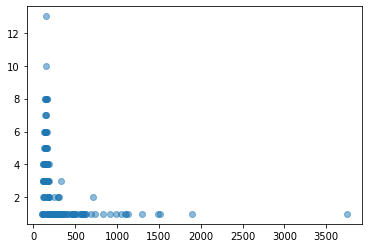

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
distribution = {}
for ii in tqdm(data.participated):
    i = int(ii)
    if i not in distribution:
      distribution[i] = 0
    distribution[i] += 1

x = []
y = []
for key in distribution:
    if key!=0:
      x.append(key)
      y.append(distribution[key])

plt.scatter(x, y, alpha=0.5)


In [ ]:
data

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,respondent,plaintiffs,third,participated,is_tenderous,region_id,email,phone
inn,,,,,,,,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,10,1,2,0.000000,0,78,0,0
1650259228,14588.0,13067.0,0.0,0.0,ООО,"['25.9', '25.62', '29.3', '45.3', '46.1', '46....",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",25.02.2013,0,2,0,0.000000,0,16,leandra05@mail.ru,+7 (960) 067-02-22
1650264267,7319.0,7470.0,0.0,0.0,ООО,"['25.9', '24.42', '25.61', '32.99.9', '43.99',...",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",24.05.2013,0,0,0,0.000000,0,16,0,0
1832106240,83.0,0.0,0.0,0.0,ООО,"['25.9', '25.1', '25.5', '25.61', '25.62', '41...",10000,"УДМУРТСКАЯ РЕСПУБЛИКА,\nГ. ИЖЕВСК",20.03.2013,0,0,0,0.000000,0,18,0,0
2901238436,11836.0,23554.0,2225.0,2430.0,ООО,"['25.9', '25.1', '25.11', '25.12', '25.50.1', ...",10000,"АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,\nГ. АРХАНГЕЛЬСК",07.06.2013,0,0,0,0.000000,0,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709056962,3973.0,10199.0,0.0,0.0,ООО,['46.69.5'],10000,ГОРОД МОСКВА,27.11.2019,0,0,0,0.000000,0,97,tender@anatrade.ru,+7 (903) 968-23-58
9715296948,57609.0,61086.0,0.0,0.0,ООО,"['46.90', '25.50', '25.61', '25.73', '25.93', ...",10000,Г.Москва,22.03.2017,0,3,0,187.294244,0,97,0,+7 (916) 109-65-46
9715310952,70747.0,96887.0,29634.0,39725.0,ООО,"['46.73', '43.31', '43.34.1', '43.34.2', '46.1...",100000,ГОРОД МОСКВА,16.01.2018,15,8,0,0.000000,0,97,208@usk1.ru,+7 (926) 146-61-40


0it [00:00, ?it/s]

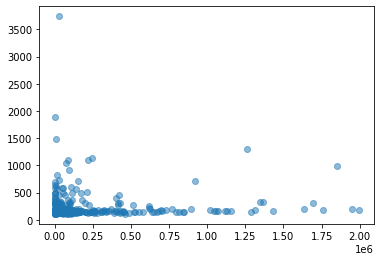

In [ ]:
import matplotlib.pyplot as plt

x = []
y = []
for i, row in tqdm(data.iterrows()):
  if row['participated']!=0 and row['revenue_x'] < 2e6:
    x.append(row['revenue_x'])
    y.append(row['participated'])

plt.scatter(x, y, alpha=0.5)

In [ ]:
data.head()

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,respondent,plaintiffs,third,participated,is_tenderous,region_id,email,phone
inn,,,,,,,,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,10,1,2,0.0,0,78,0,0
1650259228,14588.0,13067.0,0.0,0.0,ООО,"['25.9', '25.62', '29.3', '45.3', '46.1', '46....",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",25.02.2013,0,2,0,0.0,0,16,leandra05@mail.ru,+7 (960) 067-02-22
1650264267,7319.0,7470.0,0.0,0.0,ООО,"['25.9', '24.42', '25.61', '32.99.9', '43.99',...",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",24.05.2013,0,0,0,0.0,0,16,0,0
1832106240,83.0,0.0,0.0,0.0,ООО,"['25.9', '25.1', '25.5', '25.61', '25.62', '41...",10000,"УДМУРТСКАЯ РЕСПУБЛИКА,\nГ. ИЖЕВСК",20.03.2013,0,0,0,0.0,0,18,0,0
2901238436,11836.0,23554.0,2225.0,2430.0,ООО,"['25.9', '25.1', '25.11', '25.12', '25.50.1', ...",10000,"АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,\nГ. АРХАНГЕЛЬСК",07.06.2013,0,0,0,0.0,0,29,0,0


In [ ]:
data.to_csv('/content/gdrive/MyDrive/Северсталь/inns_tenderous_check.csv')

In [ ]:
total = data

In [ ]:
sber_22_19.head(1)

,cnt_participated,cnt_won,sum_participated_amount,sum_won_amount,mean_participated_amount,mean_won_amount
inn,,,,,,
1001141373,1.0,0.0,766665.0,0.0,766665.0,NaN


In [ ]:
data['cnt_participated'] = [0 for i in range(len(data))]
data['cnt_won'] = [0 for i in range(len(data))]
data['sum_participated_amount'] = [0 for i in range(len(data))]
data['sum_won_amount'] = [0 for i in range(len(data))]
data['mean_participated_amount'] = [0 for i in range(len(data))]
data['mean_won_amount'] = [0 for i in range(len(data))]
data['relevancy'] = [0 for i in range(len(data))]
for inn, row in sber_22_19.iterrows():
  if inn in data.index:
    data.loc[inn, 'cnt_participated'] = row['cnt_participated']
    data.loc[inn, 'cnt_won'] = row['cnt_won']
    data.loc[inn, 'sum_participated_amount'] = row['sum_participated_amount']
    data.loc[inn, 'sum_won_amount'] = row['sum_won_amount']
    data.loc[inn, 'mean_participated_amount'] = row['mean_participated_amount']
    data.loc[inn, 'mean_won_amount'] = row['mean_won_amount']
for inn, row in sber_25_94.iterrows():
  if inn in data.index:
    data.loc[inn, 'cnt_participated'] = row['cnt_participated']
    data.loc[inn, 'cnt_won'] = row['cnt_won']
    data.loc[inn, 'sum_participated_amount'] = row['sum_participated_amount']
    data.loc[inn, 'sum_won_amount'] = row['sum_won_amount']
    data.loc[inn, 'mean_participated_amount'] = row['mean_participated_amount']
    data.loc[inn, 'mean_won_amount'] = row['mean_won_amount']

In [ ]:
age_and_score = [
    (0.5, -20),
    (1, -10),
    (2, 0),
    (3, 5),
    (5, 15),
    (float("inf"), 20)
]

respondent_mean_year_and_score = [
    (0, 10),
    (2, 5),
    (4, 0),
    (10, -5),
    (float("inf"), -10)
]

actives_and_score = [
    (50e3, -10),
    (150e3, -5),
    (300e3, 0),
    (1e6, 5),
    (float("inf"), 10)
]

revenue_after_taxes_relative_and_score = [
    (9, -10),
    (0.5, -5),
    (0.7, 0),
    (0.85, 5),
    (float("inf"), 10)
]


tenders_count_and_score = [
    (0, 0),
    (10, 5),
    (float("inf"), 10)
]


tenders_sum_and_score = [
    (0, 0),
    (float(1e6), 5),
    (float("inf"), 10)
]

def map_for_relation(relation, value):
    for max_val, score_change in relation:
        if value <= max_val:
            return score_change
        
import warnings
from datetime import datetime
import numpy as np
warnings.simplefilter("ignore")
total["tmp_egrul_registration_date"] = pd.to_datetime(total["egrul_registration_date"], errors="coerce")
total["tmp_age"] = (datetime.now() - total["tmp_egrul_registration_date"]) / np.timedelta64(1, 'Y')
total["tmp_respondent_mean_year"] = total["respondent"] / total["tmp_age"]
total["tmp_relative_revenue"] = (total["revenue_x"] - total["short_term_debt_x"]) / total["revenue_x"]

cols_and_relations = [
    ("tmp_age", age_and_score),
    ("tmp_respondent_mean_year", respondent_mean_year_and_score),
    ("actives_x", actives_and_score),
    ("tmp_relative_revenue", revenue_after_taxes_relative_and_score),
    ("participated", tenders_count_and_score),
    ("sum_participated_amount", tenders_sum_and_score)
]

score = np.zeros(len(total))

for col, relation in cols_and_relations:
    print("col", col)
    score += total[col].map(lambda tmp_age: map_for_relation(relation, tmp_age)).values

col tmp_age
col tmp_respondent_mean_year
col actives_x
col tmp_relative_revenue
col participated
col sum_participated_amount


In [ ]:
data['trustworthiness'] = score

In [ ]:
data

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,respondent,...,sum_participated_amount,sum_won_amount,mean_participated_amount,mean_won_amount,relevancy,tmp_egrul_registration_date,tmp_age,tmp_respondent_mean_year,tmp_relative_revenue,trustworthiness
inn,,,,,,,,,,,,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,10,...,0.00,0.0,0.000000e+00,0.0,0,2012-12-10,9.242712,1.081934,0.373833,5.0
1650259228,14588.0,13067.0,0.0,0.0,ООО,"['25.9', '25.62', '29.3', '45.3', '46.1', '46....",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",25.02.2013,0,...,0.00,0.0,0.000000e+00,0.0,0,2013-02-25,9.031893,0.000000,1.000000,10.0
1650264267,7319.0,7470.0,0.0,0.0,ООО,"['25.9', '24.42', '25.61', '32.99.9', '43.99',...",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",24.05.2013,0,...,0.00,0.0,0.000000e+00,0.0,0,2013-05-24,8.790957,0.000000,1.000000,10.0
1832106240,83.0,0.0,0.0,0.0,ООО,"['25.9', '25.1', '25.5', '25.61', '25.62', '41...",10000,"УДМУРТСКАЯ РЕСПУБЛИКА,\nГ. ИЖЕВСК",20.03.2013,0,...,0.00,0.0,0.000000e+00,0.0,0,2013-03-20,8.968921,0.000000,NaN,NaN
2901238436,11836.0,23554.0,2225.0,2430.0,ООО,"['25.9', '25.1', '25.11', '25.12', '25.50.1', ...",10000,"АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,\nГ. АРХАНГЕЛЬСК",07.06.2013,0,...,0.00,0.0,0.000000e+00,0.0,0,2013-07-06,8.673227,0.000000,0.905536,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709056962,3973.0,10199.0,0.0,0.0,ООО,['46.69.5'],10000,ГОРОД МОСКВА,27.11.2019,0,...,1354341.64,0.0,1.354342e+06,NaN,0,2019-11-27,2.280215,0.000000,1.000000,NaN
9715296948,57609.0,61086.0,0.0,0.0,ООО,"['46.90', '25.50', '25.61', '25.73', '25.93', ...",10000,Г.Москва,22.03.2017,0,...,6462882.53,1714329.0,2.154294e+06,1714329.0,0,2017-03-22,4.963363,0.000000,1.000000,30.0
9715310952,70747.0,96887.0,29634.0,39725.0,ООО,"['46.73', '43.31', '43.34.1', '43.34.2', '46.1...",100000,ГОРОД МОСКВА,16.01.2018,15,...,2437115.08,0.0,2.437115e+06,NaN,0,2018-01-16,4.141991,3.621446,0.694139,NaN


In [ ]:
data.to_csv('/content/gdrive/MyDrive/Северсталь/inns_tenderous_check.csv')

In [ ]:
data = data.fillna(0)

In [ ]:
relevancy = []
for inn, row in data.iterrows():
  relevancy.append((row['trustworthiness']+1) * row['revenue_x'] * (row['participated'] + 1))
data['relevancy'] = relevancy

In [ ]:
data

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,respondent,...,sum_participated_amount,sum_won_amount,mean_participated_amount,mean_won_amount,relevancy,tmp_egrul_registration_date,tmp_age,tmp_respondent_mean_year,tmp_relative_revenue,trustworthiness
inn,,,,,,,,,,,,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,10,...,0.00,0.0,0.000000e+00,0.0,2.589180e+05,2012-12-10 00:00:00,9.242712,1.081934,0.373833,5.0
1650259228,14588.0,13067.0,0.0,0.0,ООО,"['25.9', '25.62', '29.3', '45.3', '46.1', '46....",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",25.02.2013,0,...,0.00,0.0,0.000000e+00,0.0,1.437370e+05,2013-02-25 00:00:00,9.031893,0.000000,1.000000,10.0
1650264267,7319.0,7470.0,0.0,0.0,ООО,"['25.9', '24.42', '25.61', '32.99.9', '43.99',...",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",24.05.2013,0,...,0.00,0.0,0.000000e+00,0.0,8.217000e+04,2013-05-24 00:00:00,8.790957,0.000000,1.000000,10.0
1832106240,83.0,0.0,0.0,0.0,ООО,"['25.9', '25.1', '25.5', '25.61', '25.62', '41...",10000,"УДМУРТСКАЯ РЕСПУБЛИКА,\nГ. ИЖЕВСК",20.03.2013,0,...,0.00,0.0,0.000000e+00,0.0,0.000000e+00,2013-03-20 00:00:00,8.968921,0.000000,0.000000,0.0
2901238436,11836.0,23554.0,2225.0,2430.0,ООО,"['25.9', '25.1', '25.11', '25.12', '25.50.1', ...",10000,"АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,\nГ. АРХАНГЕЛЬСК",07.06.2013,0,...,0.00,0.0,0.000000e+00,0.0,2.590940e+05,2013-07-06 00:00:00,8.673227,0.000000,0.905536,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709056962,3973.0,10199.0,0.0,0.0,ООО,['46.69.5'],10000,ГОРОД МОСКВА,27.11.2019,0,...,1354341.64,0.0,1.354342e+06,0.0,1.019900e+04,2019-11-27 00:00:00,2.280215,0.000000,1.000000,0.0
9715296948,57609.0,61086.0,0.0,0.0,ООО,"['46.90', '25.50', '25.61', '25.73', '25.93', ...",10000,Г.Москва,22.03.2017,0,...,6462882.53,1714329.0,2.154294e+06,1714329.0,3.565664e+08,2017-03-22 00:00:00,4.963363,0.000000,1.000000,30.0
9715310952,70747.0,96887.0,29634.0,39725.0,ООО,"['46.73', '43.31', '43.34.1', '43.34.2', '46.1...",100000,ГОРОД МОСКВА,16.01.2018,15,...,2437115.08,0.0,2.437115e+06,0.0,9.688700e+04,2018-01-16 00:00:00,4.141991,3.621446,0.694139,0.0


In [ ]:
data.relevancy.value_counts()

0.0           966
275.0           2
566.0           2
8350.0          2
173008.0        2
             ... 
65516.0         1
95326.0         1
216667.0        1
15719991.0      1
18072.0         1
Name: relevancy, Length: 2442, dtype: int64

In [ ]:
data.to_csv('/content/gdrive/MyDrive/Северсталь/inns_tenderous_check.csv')

In [307]:
data1 = pd.read_csv('/content/gdrive/MyDrive/Северсталь/okved_companies_data_sber.csv', index_col = 0).set_index('inn')
data2 = pd.read_csv('/content/gdrive/MyDrive/Северсталь/okved_companies_data.csv', index_col = 0).set_index('inn')
ogrns = pd.concat([data1, data2])

In [308]:
ogrns

,ogrn,respondent,plaintiffs,third,Unnamed: 0.1,okved
inn,,,,,,
7327002626,1027301481008,184,281,22,NaN,NaN
4205281286,1144205002171,28,14,3,NaN,NaN
4027058189,1024001186747,1,7,0,NaN,NaN
2460110863,1182468060664,0,1,0,NaN,NaN
540505309199,304540434100046,3,17,0,NaN,NaN
...,...,...,...,...,...,...
7415101591,1187456049450,0,0,0,2614.0,25.94
5027271631,1185027030253,5,0,0,2615.0,25.94
9109023041,1199112007324,0,1,0,2616.0,25.94


In [309]:
data['ogrn'] = [0 for i in range(len(data))]
for inn, row in ogrns.iterrows():
  data.loc[inn, 'ogrn'] = row['ogrn']

In [310]:
data

,actives_x,revenue_x,short_term_debt_x,long_term_debt_x,name,okveds,ustavnoi_capital,location,egrul_registration_date,respondent,...,sum_won_amount,mean_participated_amount,mean_won_amount,relevancy,tmp_egrul_registration_date,tmp_age,tmp_respondent_mean_year,tmp_relative_revenue,trustworthiness,ogrn
inn,,,,,,,,,,,,,,,,,,,,,
7811533500,26011.0,43153.0,27021.0,70.0,ООО,"['25.9', '25.99.21', '46.15.2', '46.90', '47.5...",15000,ГОРОД САНКТ-ПЕТЕРБУРГ,12.10.2012,10,...,0.0,0.000000e+00,0.0,2.589180e+05,2012-12-10 00:00:00,9.242712,1.081934,0.373833,5.0,1127847550566
1650259228,14588.0,13067.0,0.0,0.0,ООО,"['25.9', '25.62', '29.3', '45.3', '46.1', '46....",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",25.02.2013,0,...,0.0,0.000000e+00,0.0,1.437370e+05,2013-02-25 00:00:00,9.031893,0.000000,1.000000,10.0,1131650003561
1650264267,7319.0,7470.0,0.0,0.0,ООО,"['25.9', '24.42', '25.61', '32.99.9', '43.99',...",10000,"РЕСПУБЛИКА ТАТАРСТАН,\nГ. НАБЕРЕЖНЫЕ ЧЕЛНЫ",24.05.2013,0,...,0.0,0.000000e+00,0.0,8.217000e+04,2013-05-24 00:00:00,8.790957,0.000000,1.000000,10.0,1131650008940
1832106240,83.0,0.0,0.0,0.0,ООО,"['25.9', '25.1', '25.5', '25.61', '25.62', '41...",10000,"УДМУРТСКАЯ РЕСПУБЛИКА,\nГ. ИЖЕВСК",20.03.2013,0,...,0.0,0.000000e+00,0.0,0.000000e+00,2013-03-20 00:00:00,8.968921,0.000000,0.000000,0.0,1131832001806
2901238436,11836.0,23554.0,2225.0,2430.0,ООО,"['25.9', '25.1', '25.11', '25.12', '25.50.1', ...",10000,"АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,\nГ. АРХАНГЕЛЬСК",07.06.2013,0,...,0.0,0.000000e+00,0.0,2.590940e+05,2013-07-06 00:00:00,8.673227,0.000000,0.905536,10.0,1132901006424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709056962,3973.0,10199.0,0.0,0.0,ООО,['46.69.5'],10000,ГОРОД МОСКВА,27.11.2019,0,...,0.0,1.354342e+06,0.0,1.019900e+04,2019-11-27 00:00:00,2.280215,0.000000,1.000000,0.0,1197746695343
9715296948,57609.0,61086.0,0.0,0.0,ООО,"['46.90', '25.50', '25.61', '25.73', '25.93', ...",10000,Г.Москва,22.03.2017,0,...,1714329.0,2.154294e+06,1714329.0,3.565664e+08,2017-03-22 00:00:00,4.963363,0.000000,1.000000,30.0,1177746281459
9715310952,70747.0,96887.0,29634.0,39725.0,ООО,"['46.73', '43.31', '43.34.1', '43.34.2', '46.1...",100000,ГОРОД МОСКВА,16.01.2018,15,...,0.0,2.437115e+06,0.0,9.688700e+04,2018-01-16 00:00:00,4.141991,3.621446,0.694139,0.0,1187746027237


In [311]:
data.to_csv('/content/gdrive/MyDrive/Северсталь/inns_tenderous_check.csv')

In [312]:
with open('/content/gdrive/MyDrive/Северсталь/inn2name.json') as f:
  inn2name = json.load(f)



In [313]:
inn2name

{'6163209592': 'ООО ТРАНСРЕАЛПРО ПЛЮС',
 '5318010472': 'ООО ЗАВОД ДОН ИЗОЛЯТОР',
 '5022058691': 'ООО ЭЩМ',
 '2635215997': 'ООО ПФ АТИ',
 '6440036922': 'ООО АКВАРЕЛЬ',
 '3444080860': 'ООО КОМПАНИЯ ',
 '5043052612': 'ООО  ДАСИМЕК',
 '6325002026': 'АО НЕФТЕХИМЗАПЧАСТЬ',
 '8602153760': 'ООО СОЮЗМЕХАНИКА',
 '7806349745': 'ООО АРС-С',
 '1644097000': 'ООО ЭКОСТИЛЬ',
 '6506011907': 'ООО САХЭКОТРАНС',
 '1657242167': 'ООО ПО ГВИНН',
 '6448010281': 'ООО ХЗГА',
 '5433976426': 'ООО АМОРТЕКС',
 '5041203834': 'ООО ПКФ ПРОГРЕСС МС',
 '3663104112': 'ООО САНТЕХЛИГА',
 '9705038553': 'ООО ПРОФТРЕЙД',
 '7451075788': 'ООО АГРОСНАБ',
 '551404145880': None,
 '7716812951': 'ООО КСЗ',
 '7802796333': 'ООО ТАМЕРЛАН',
 '7604377919': 'ООО ФАНЗИП',
 '3329074107': 'ООО ЭКО-ПРОМ',
 '7449139466': 'ООО ПРОМТЕХПОСТАВКА',
 '3812100082': 'ООО СИРИУС',
 '7302042722': 'ООО ПЛАСТТОРГ',
 '6453019089': 'ООО ЭСКОСАР',
 '6950153408': 'ООО ТЗИК',
 '5252018076': 'ООО ПРАКТИК',
 '5503104735': 'ООО БЮРО ',
 '3250063175': 'ООО ЭЛЕКТРО

In [319]:
names = []
for i, row in data.iterrows():
  try:
    names.append(inn2name[str(i)])
  except:
    names.append(0)

In [320]:
data['name'] = names

In [321]:
data.name.value_counts()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [322]:
data.to_csv('/content/gdrive/MyDrive/Северсталь/inns_tenderous_check.csv')

In [324]:
data.loc[7701019588, :]

actives_x                                                              2459595.0
revenue_x                                                              7284758.0
short_term_debt_x                                                       776372.0
long_term_debt_x                                                        471502.0
name                                                                     АО ФАРМ
okveds                         ['46.49.33', '46.3', '46.43', '46.44', '46.49'...
ustavnoi_capital                                                           50000
location                                                            ГОРОД МОСКВА
egrul_registration_date                                               14.08.2002
respondent                                                                    12
plaintiffs                                                                   213
third                                                                          3
participated                

In [325]:
data.loc[7704543951, :]

actives_x                                                              2742313.0
revenue_x                                                              7794560.0
short_term_debt_x                                                      2218523.0
long_term_debt_x                                                        259036.0
name                                                        ООО КОМПАНИЯ ХЕЛИКОН
okveds                         ['46.46.2', '21.10', '21.20', '21.20.2', '23.1...
ustavnoi_capital                                                         1000000
location                                                            ГОРОД МОСКВА
egrul_registration_date                                               18.01.2005
respondent                                                                    11
plaintiffs                                                                    23
third                                                                          3
participated                